In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            0     0   
69996  99995  22601    1     158   126.0    140     90            1     1   
69997  99996  19066    2     183   105.0    180     90            1     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  height_m        bmi  overweight  
0    

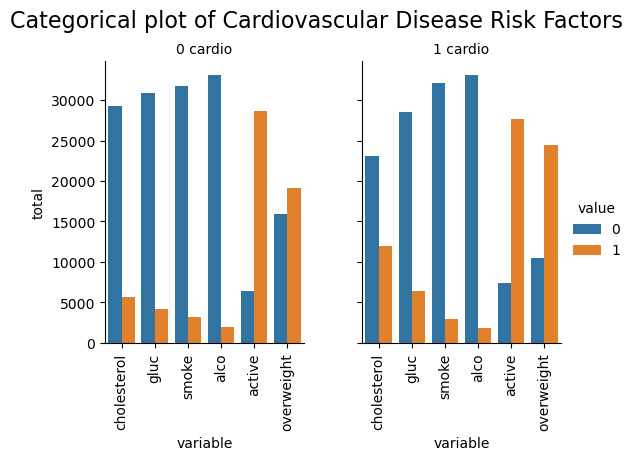

          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            0     0   
1          1  20228    1     156    85.0    140     90            1     0   
2          2  18857    1     165    64.0    130     70            1     0   
3          3  17623    2     169    82.0    150    100            0     0   
4          4  17474    1     156    56.0    100     60            0     0   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69993  99991  19699    1     172    70.0    130     90            0     0   
69994  99992  21074    1     165    80.0    150     80            0     0   
69995  99993  19240    2     168    76.0    120     80            0     0   
69998  99998  22431    1     163    72.0    135     80            0     1   
69999  99999  20540    1     170    72.0    120     80            1     0   

       smoke  alco  active  cardio  height_m        bmi  overweight  
0    

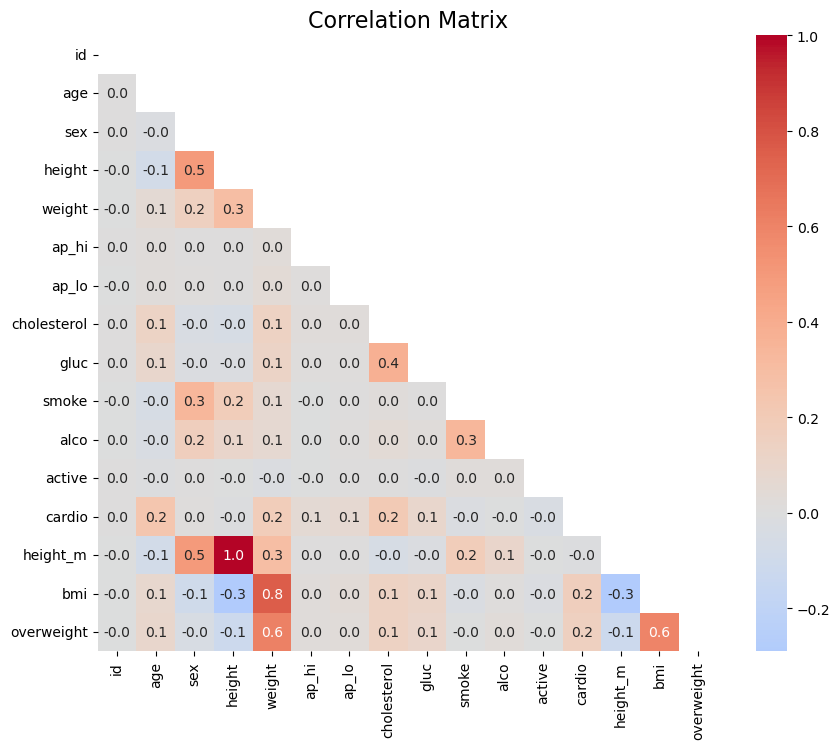

In [56]:
# Import data
df = pd.read_csv('medical_examination.csv')

# Add 'overweight' column
df['height_m'] = df['height'] / 100
df['bmi'] = df['weight'] / df['height_m'] ** 2
df['overweight'] = 0
df.loc[df['bmi'] > 25, 'overweight'] = 1


def normalize_cholesterolgluc(value):
    if value == 1:
        return 0
    elif value > 1:
        return 1
    else:
        return value
    
df['cholesterol'] = df['cholesterol'].map(normalize_cholesterolgluc)
df['gluc'] = df['gluc'].map(normalize_cholesterolgluc)
print(df)
print(df[df['smoke']==0].count())

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.


# Draw Categorical Plot
def draw_cat_plot():
    # Wybierz odpowiednie kolumny do wykresu kategorii
    df_cat = df.melt(id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Rysowanie wykresu kategorii z 'seaborn.catplot()'
    g = sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count', height=4, aspect=0.7)
    g.set_axis_labels('variable', 'total')
    g.set_titles("{col_name} {col_var}")
    g.set_xticklabels(rotation=90)
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle('Categorical plot of Cardiovascular Disease Risk Factors', fontsize=16)

    plt.savefig('catplot.png')
    plt.show()
    return g


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = None
    # Warunki do odfiltrowania błędnych danych
    condition_diastolic_pressure = df['ap_lo'] <= df['ap_hi']
    condition_height_lower = df['height'] >= df['height'].quantile(0.025)
    condition_height_upper = df['height'] <= df['height'].quantile(0.975)
    condition_weight_lower = df['weight'] >= df['weight'].quantile(0.025)
    condition_weight_upper = df['weight'] <= df['weight'].quantile(0.975)

# Odfiltrowanie błędnych danych
    df_cleaned = df[condition_diastolic_pressure & condition_height_lower & condition_height_upper & condition_weight_lower & condition_weight_upper]

# Wyświetlenie wynikowego DataFrame po oczyszczeniu danych
    print(df_cleaned)

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None



    # Set up the matplotlib figure
    # fig, ax = None

    # # Draw the heatmap with 'sns.heatmap()'
    
    # Obliczenie macierzy korelacji
    correlation_matrix = df.corr()

    # Utworzenie maski dla górnej trójkątnej macierzy korelacji
    mask = np.triu(correlation_matrix)

    # Ustawienie rozmiaru wykresu
    plt.figure(figsize=(10, 8))

    # Narysowanie wykresu ciepła z 'seaborn.heatmap()'
    sns.heatmap(correlation_matrix, annot=True, fmt='.1f', mask=mask, cmap='coolwarm', center=0)

    # Ustawienie tytułu wykresu
    plt.title('Correlation Matrix', fontsize=16)

    plt.show()

    # # Do not modify the next two lines
    # fig.savefig('heatmap.png')
    # return fig
draw_cat_plot()
draw_heat_map()